# Hyperparameter Optimization


We used random search for doing the hyperparameter optimization

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [31]:
directory = '../../results/FINAL_2/'

In [88]:
val_loss = []
filters = []
kernels = []
res = []
val_epoch = []
lr = []
l2 = []
for i in range(44):
    with open(directory + str(i+1)+'/model-history.pkl', 'rb') as f:
        data= pickle.load(f)
        val_loss.append(data['model']['val_loss'][-1])
        filters.append(str(data['parameters']['num_filters']))
        kernels.append(str(data['parameters']['kernel_size']))
        res.append(str(data['parameters']['res_blocks']))
        lr.append(str(data['model']['lr'][0]))
        l2.append(str(data['parameters']['l2']))
        val_epoch.append(data['model']['val_loss'])

Getting best models

In [33]:
best_models = np.argsort(val_loss)
best_models +1

array([28, 40, 27, 16, 15, 22, 38, 44, 17, 21, 36, 20, 18, 41,  9, 39, 11,
       25, 33, 12,  5, 29,  4, 14, 10,  8,  1, 13,  6,  7, 34,  3, 23,  2,
       32, 19, 26, 24, 37, 42, 35, 30, 31, 43])

Two models were interrupted

In [34]:
np.sort(val_loss)

array([0.04368008, 0.04468215, 0.04657751, 0.04725984, 0.04822509,
       0.04848919, 0.04897143, 0.05016595, 0.05033535, 0.05104194,
       0.05144404, 0.05159494, 0.05187805, 0.05380616, 0.05598624,
       0.05811455, 0.06060733, 0.06258147, 0.06332156, 0.06468768,
       0.06747396, 0.06832984, 0.06920101, 0.07024735, 0.07219487,
       0.07389252, 0.07446109, 0.07494862, 0.07897267, 0.08666363,
       0.0981876 , 0.09845497, 0.13068397, 0.46515048, 1.02904642,
       1.39223504, 1.41514158, 6.98163414, 7.21572733, 7.23387623,
       7.25061703, 7.33144999,        nan,        nan])

Opening history file of the best models

In [35]:
with open(directory + '28/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/28',
 'num_convs': 4,
 'num_filters': 23,
 'kernel_size': 4,
 'lr': 0.0009243681625712621,
 'res_blocks': 1,
 'l2': 0.0001,
 'extra': False,
 'gaussian': False}

In [36]:
with open(directory + '40/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/40',
 'num_convs': 4,
 'num_filters': 20,
 'kernel_size': 5,
 'lr': 0.0005898859206688481,
 'res_blocks': 1,
 'l2': 5.898859206688481e-05,
 'extra': False,
 'gaussian': False}

In [37]:
with open(directory + '27/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/27',
 'num_convs': 4,
 'num_filters': 23,
 'kernel_size': 4,
 'lr': 0.00012036046360303748,
 'res_blocks': 1,
 'l2': 1.3700601995153551e-05,
 'extra': False,
 'gaussian': False}

Model 40 and 27 have basically the same parameters...

## Visualizing the validation loss for each model depending on the number of filters

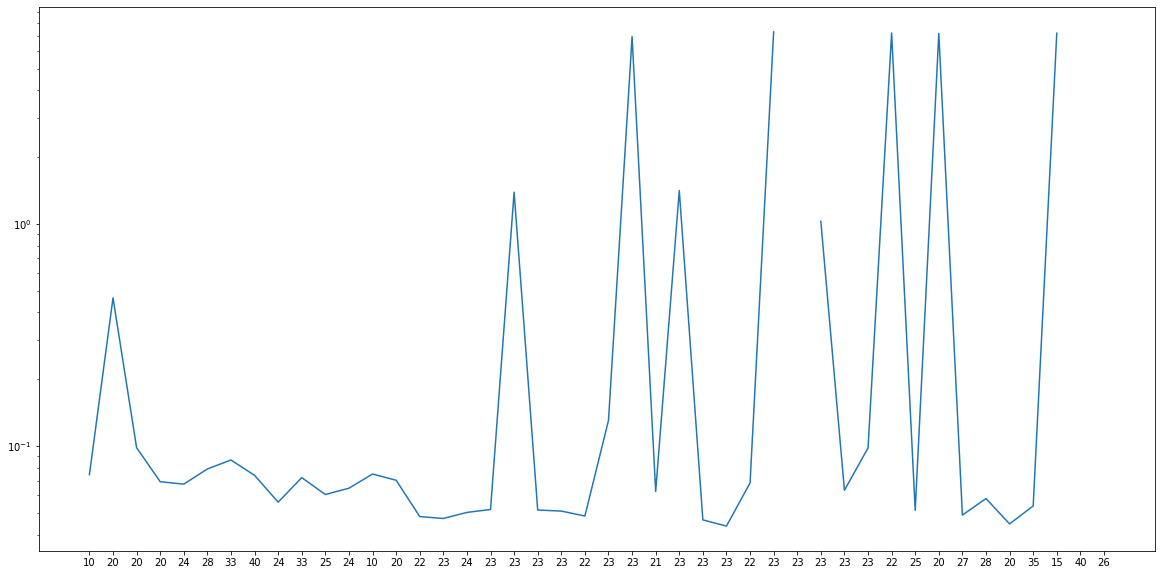

In [39]:
fig = plt.figure(figsize=(20,10))
filters_x = [i for i in range(len(filters))]
plt.plot(filters_x, val_loss)
plt.xticks(filters_x, filters)
plt.yscale('log')

Since they are not in order its dificult to see the best model, so lets sort them

[ 0 12 41  1  2  3 39 36 13 24 34 28 14 21 23 31 30 29 27 26 25 32 33 20
 19 18 17 15 22  4 11 16  8 35 10 43 37 38  5  9  6 40 42  7]


Text(0, 0.5, 'Validation Loss')

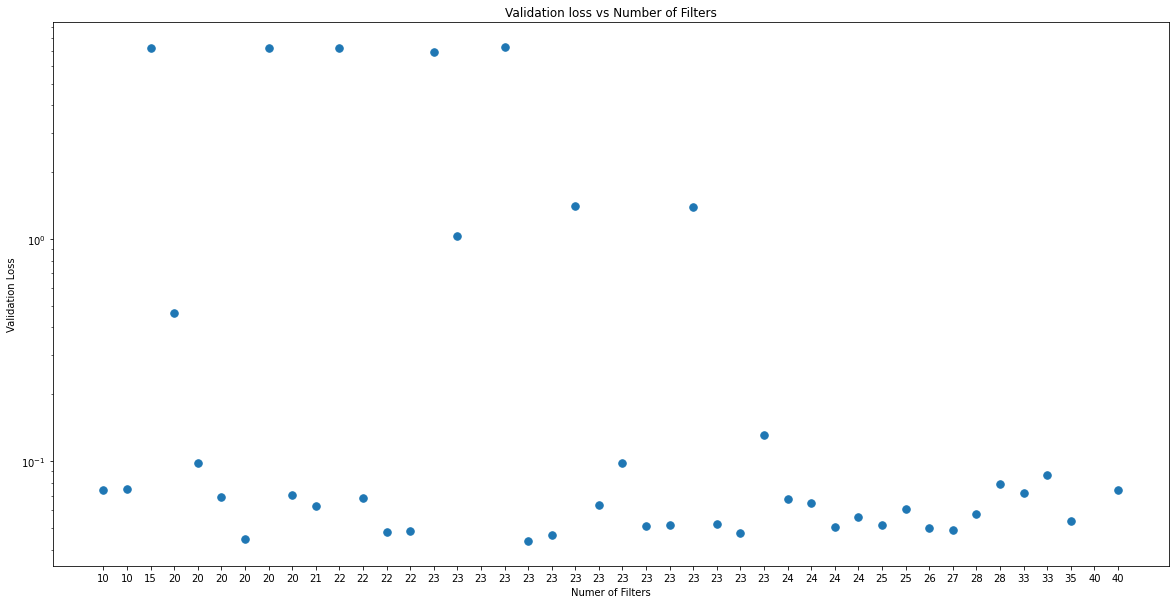

In [40]:
sort_loss = np.argsort(filters)
print(sort_loss)

sorted_vals = [val_loss[i] for i in sort_loss]
filters.sort()

fig = plt.figure(figsize=(20,10))
filters_x = [i for i in range(len(filters))]
plt.plot(filters_x, sorted_vals,".", markersize=15)
plt.xticks(filters_x, filters)
plt.yscale('log')
plt.title('Validation loss vs Number of Filters')
plt.xlabel('Numer of Filters')
plt.ylabel('Validation Loss')


The minimum is reached by 20 and 23 filters, there is a tendency, some of the losses are very high since they didnt converge because of other set parameters.

Now we will sort by kernel size

[ 0 42 22 17  1 31 30 29 28 18 26 25 24 23 33 19 32 27 21 15  5  6  7  8
  9  4 11 12 13 14 40 39 37 43 20  2 10 36 34 35  3 38 16 41]


Text(0, 0.5, 'Validation loss')

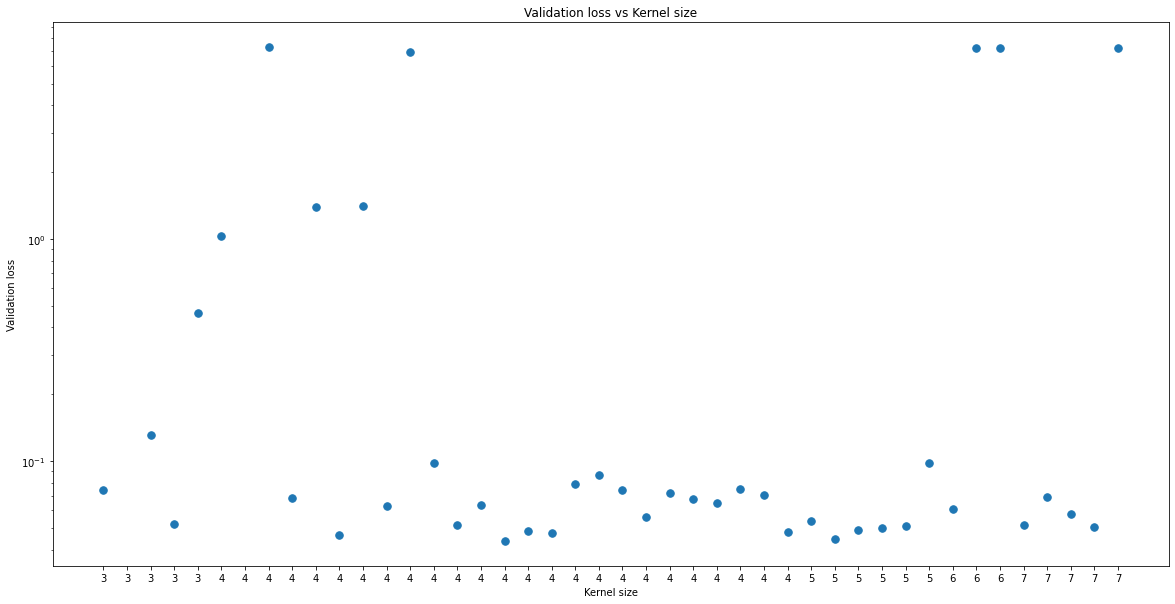

In [42]:
sort_loss = np.argsort(kernels)
print(sort_loss)

sorted_vals = [val_loss[i] for i in sort_loss]
kernels.sort()

fig = plt.figure(figsize=(20,10))
kernels_x = [i for i in range(len(kernels))]
plt.plot(kernels_x, sorted_vals,".", markersize=15)
plt.xticks(kernels_x, kernels)
plt.yscale('log')
plt.title('Validation loss vs Kernel size')
plt.xlabel('Kernel size')
plt.ylabel('Validation loss')

Seems that a kernel size between 4 and 5 lead to best results.

[ 0 18  7  6  5 25  3  2  1  4 27 28 29 30 31 32 34 35 36 26 38 39 40 41
 33 37 21 14  8  9 10 24 15 43 17 20 42 22 16 19 12 11 13 23]


Text(0, 0.5, 'Validation loss')

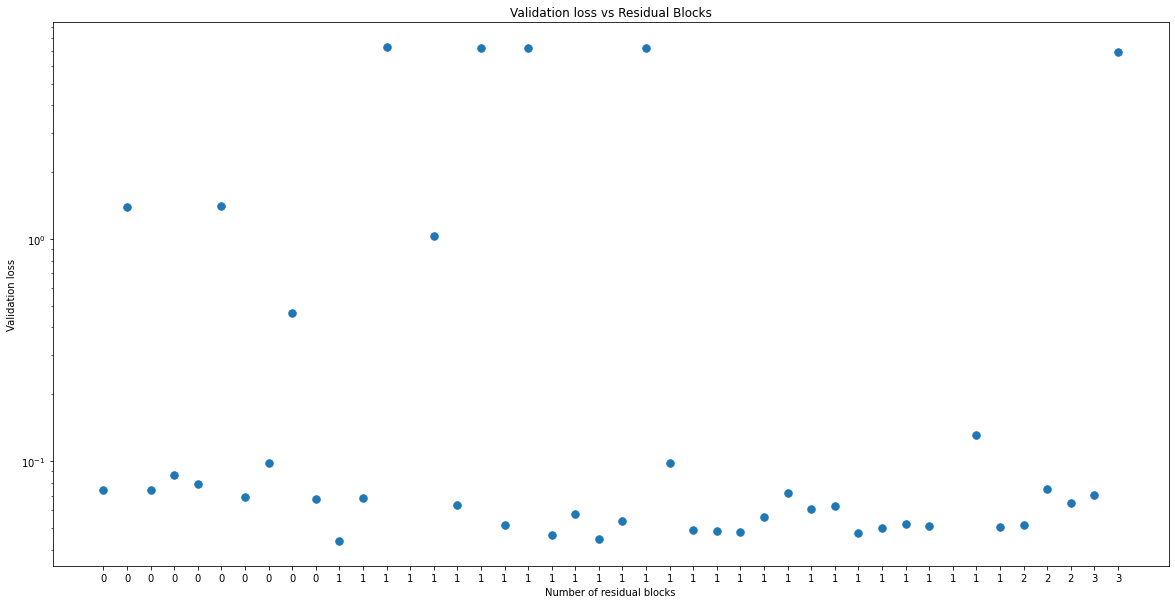

In [89]:
sort_loss = np.argsort(res)
print(sort_loss)

sorted_vals = [val_loss[i] for i in sort_loss]
res.sort()

fig = plt.figure(figsize=(20,10))
res_x = [i for i in range(len(res))]
plt.plot(res_x, sorted_vals, ".", markersize=15)
plt.xticks(res_x, res)
plt.yscale('log')
plt.title('Validation loss vs Residual Blocks')
plt.xlabel('Number of residual blocks')
plt.ylabel('Validation loss')

One residual layer seems to lead better results.

[ 1  6  5  7  2  9 12 13  3  4  0 38 20 37 24 26 33 28 35 43 10 11 14 25
 18 16 31 15 19 42  8 17 22 40 39 23 36 34 32 21 27 41 29 30]


Text(0, 0.5, 'Validation loss')

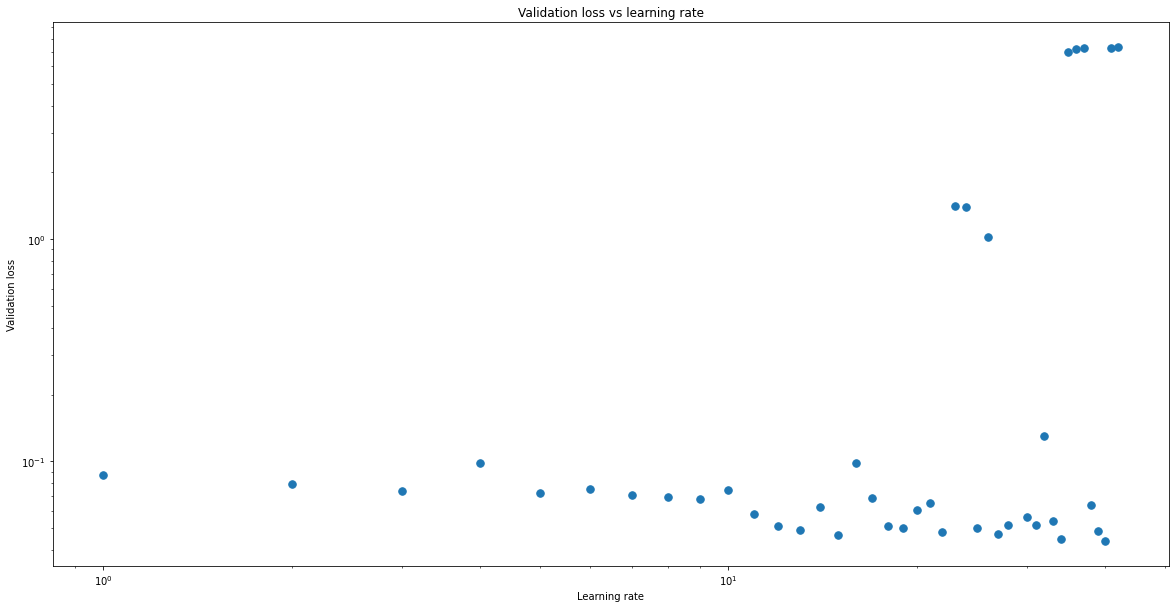

In [44]:
lr_f = [float(lr[i]) for i in range(len(lr))]
sort_loss = np.argsort(lr_f)
print(sort_loss)

sorted_vals = [val_loss[i] for i in sort_loss]
lr_f.sort()

fig = plt.figure(figsize=(20,10))
lr_x = [i for i in range(len(lr))]
plt.plot(lr_x, sorted_vals,  ".", markersize=15)
#sorted_vals = [round(float(i),5) for i in lr_f]
plt.xticks(lr_x, lr_f)
plt.xscale('log') # Set log scale on X-axis
plt.yscale('log')
plt.title('Validation loss vs learning rate')
plt.xlabel('Learning rate')
plt.ylabel('Validation loss')

[38 37 20  1  6 24 26  5  7 35 43  2  9 14 42 12 13 25 40  3 18 39  4  0
 36 34 16 41 15 19 27 28 29 10 17 11 22 23  8 30 21 31 32 33]


[1.0464070636335482e-05,
 1.1240413522680963e-05,
 1.1843639667529633e-05,
 1.1901412636835974e-05,
 1.3279549173052378e-05,
 1.3634462025551165e-05,
 1.3700601995153551e-05,
 1.4210119680663186e-05,
 1.4218815219168121e-05,
 1.4472065582212158e-05,
 1.4491149572437195e-05,
 2.038391304887775e-05,
 2.5894116171664004e-05,
 3.3978255891106324e-05,
 3.940301052318075e-05,
 4.258477745203373e-05,
 4.6138517285305476e-05,
 5.4847721317529746e-05,
 5.520337003620233e-05,
 5.625422535555992e-05,
 5.627181565812489e-05,
 5.898859206688481e-05,
 6.004485558672635e-05,
 6.394966049141514e-05,
 6.960129737169288e-05,
 7.356563627902082e-05,
 7.671001072678197e-05,
 9.296475115039731e-05,
 9.735422084893119e-05,
 9.78066650061005e-05,
 0.0001,
 0.0001,
 0.0001,
 0.00011110824253894448,
 0.00012114849276676545,
 0.00012260647913850726,
 0.00016024194580370517,
 0.00023257281986993592,
 0.00023615058774549902,
 0.00040927086417194797,
 0.0004208183885805803,
 0.0008,
 0.001,
 0.001]

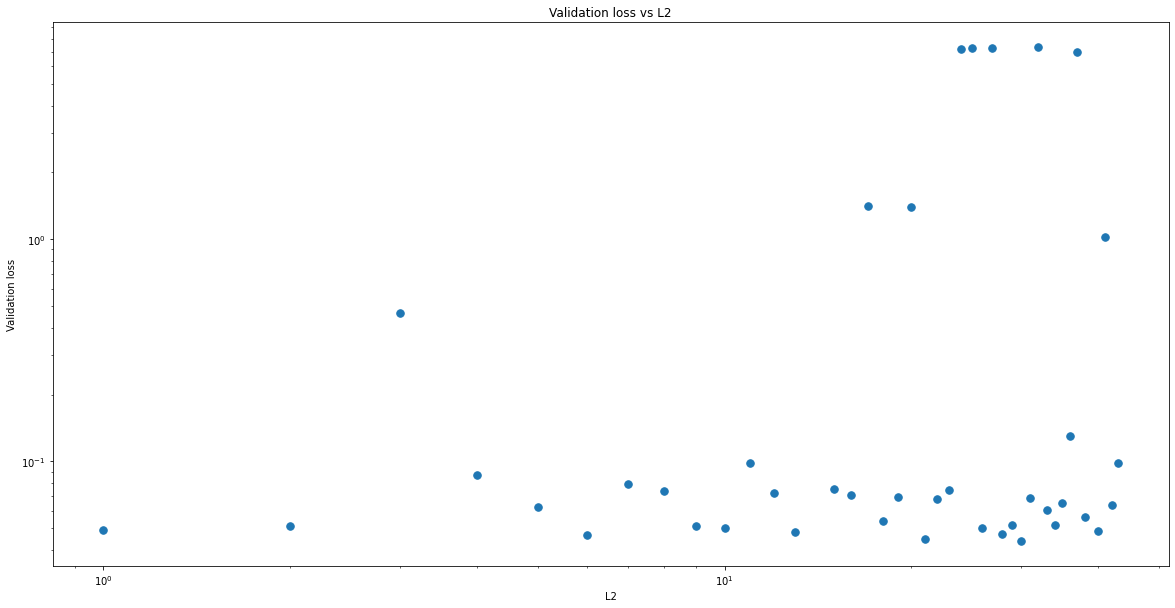

In [45]:
l2_f = [float(l2[i]) for i in range(len(l2))]
sort_loss = np.argsort(l2_f)
print(sort_loss)

sorted_vals = [val_loss[i] for i in sort_loss]
l2_f.sort()

fig = plt.figure(figsize=(20,10))
l2_x = [i for i in range(len(l2))]
plt.plot(l2_x, sorted_vals,  ".", markersize=15)
#sorted_vals = [round(float(i),5) for i in lr_f]
plt.xticks(l2_x, l2_f)
plt.xscale('log') # Set log scale on X-axis
plt.yscale('log')
plt.title('Validation loss vs L2')
plt.xlabel('L2')
plt.ylabel('Validation loss')

Text(0, 0.5, 'MSE')

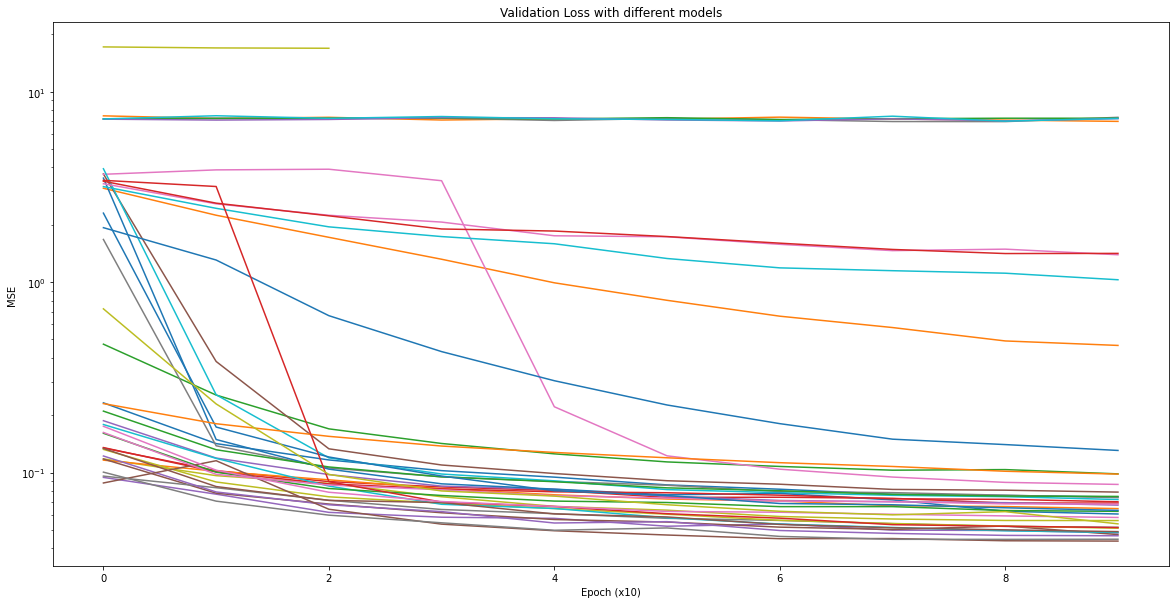

In [46]:
fig = plt.figure(figsize=(20,10))
x = range(10)
a = list(range(16))
b = list(range(18,43))
for i in a+b:
    
    plt.plot(x, val_epoch[i], label = 'Model' + str(i+1))
    
plt.yscale('log')
plt.title('Validation Loss with different models')
plt.xlabel('Epoch (x10)')
plt.ylabel('MSE')

In [47]:
sort_loss = np.argsort(val_loss)

lr_f = [float(lr[i]) for i in sort_loss]
l2_f = [float(l2[i]) for i in sort_loss]
kernels_f = [float(kernels[i]) for i in sort_loss]
filters_f = [float(filters[i]) for i in sort_loss]
res_f = [float(res[i]) for i in sort_loss]

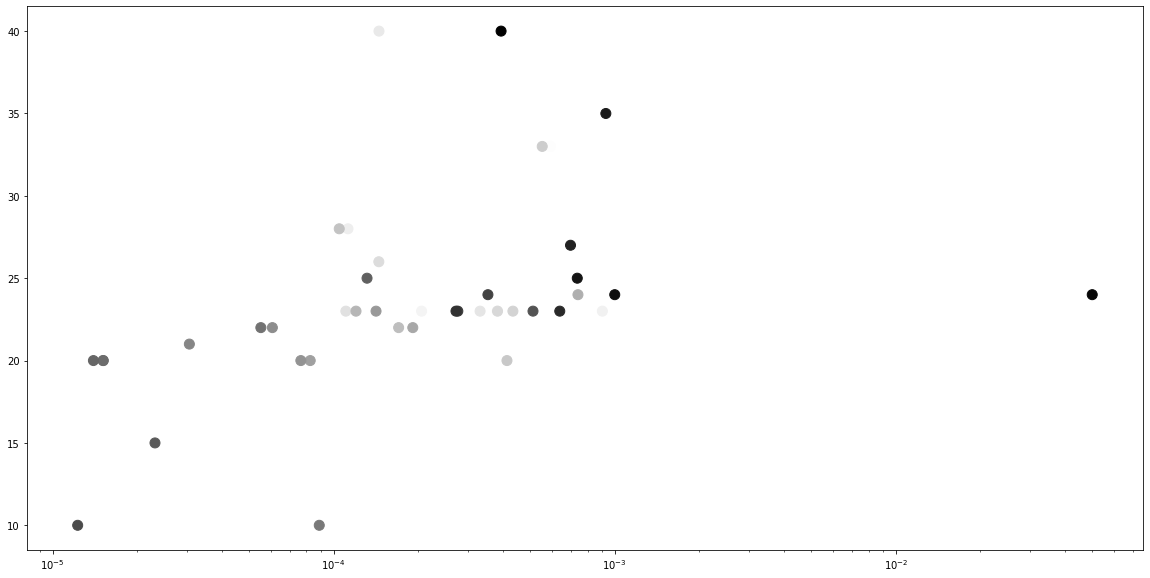

In [48]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.scatter(lr_f, filters_f, c = list(range(len(sort_loss))), s =100, cmap='Greys')
plt.xscale('log') 
plt.show()

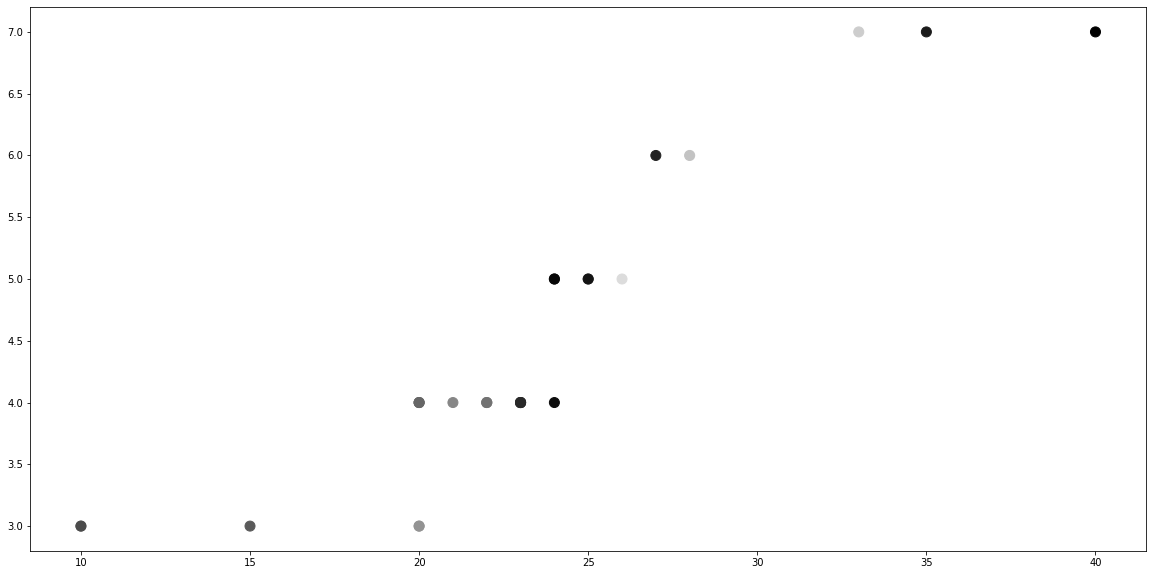

In [49]:
fig = plt.figure(figsize=(20,10))
plt.scatter(filters_f, kernels_f,  c = list(range(len(sort_loss))), s =100, cmap='Greys')

plt.show()

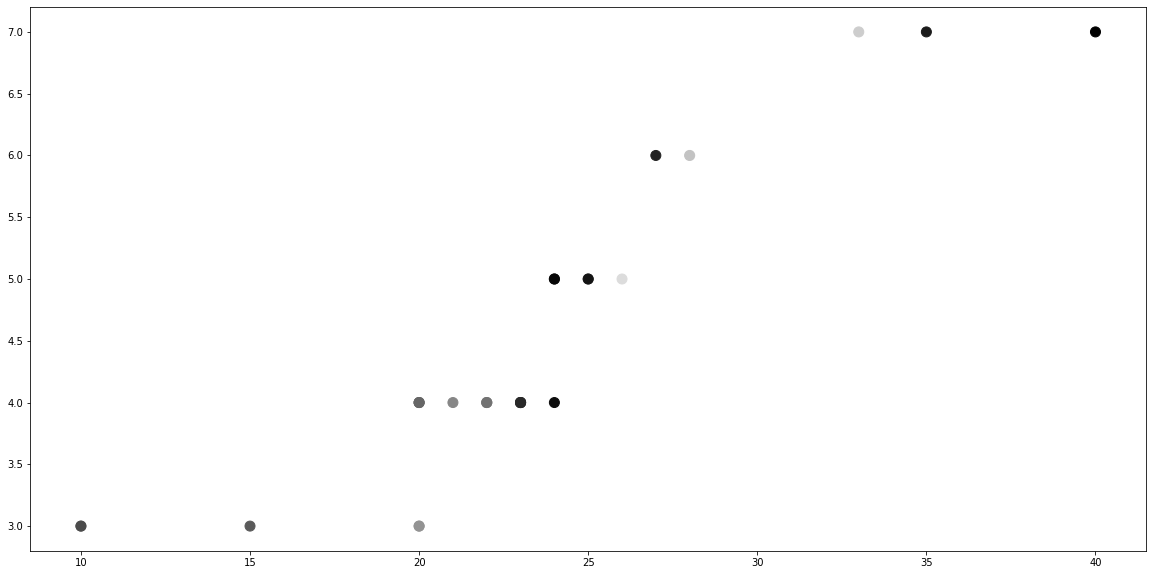

In [50]:
fig = plt.figure(figsize=(20,10))
plt.scatter(filters_f, kernels_f,  c = list(range(len(sort_loss))), s =100, cmap='Greys')

plt.show()

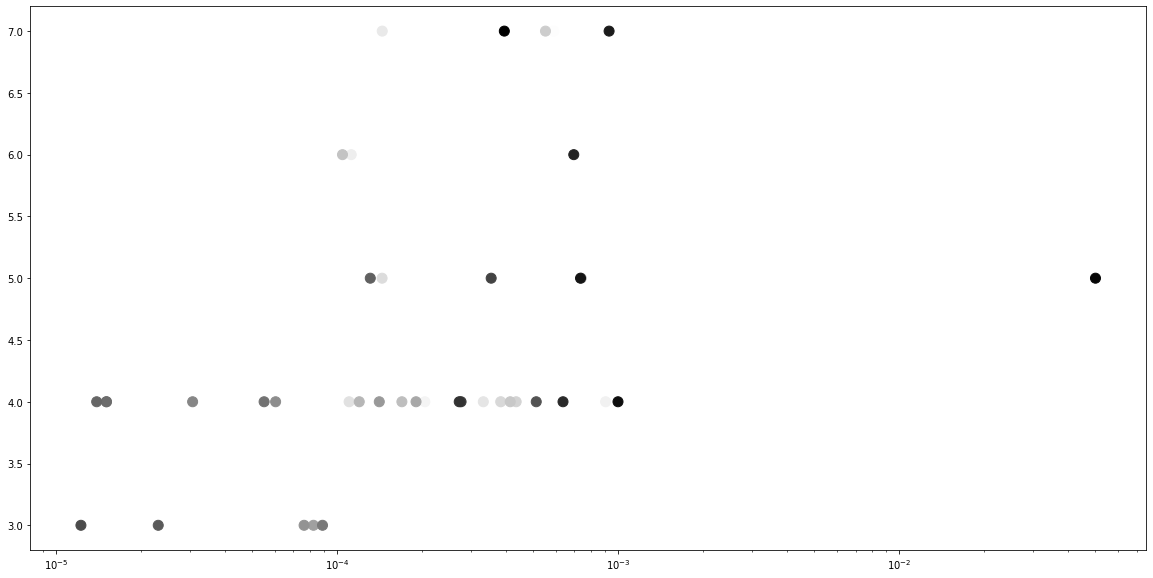

In [51]:
fig = plt.figure(figsize=(20,10))
plt.scatter(lr_f, kernels_f,  c = list(range(len(sort_loss))), s =100, cmap='Greys')
plt.xscale('log') 
plt.show()

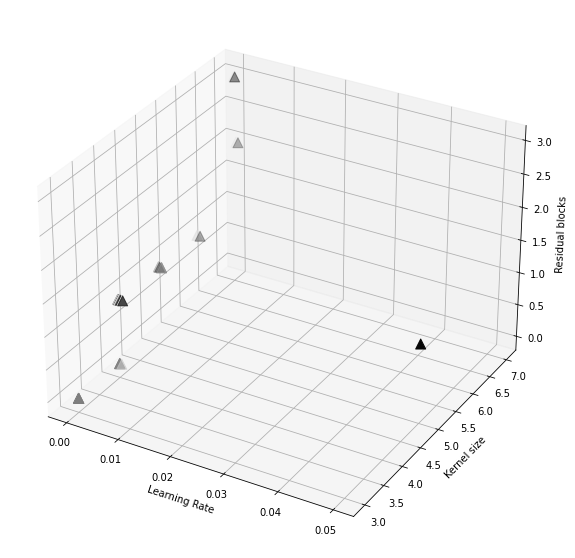

In [59]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(lr_f, kernels_f, res_f, c  = list(range(len(sort_loss))), s =100,  marker=m, cmap='Greys')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Kernel size')
ax.set_zlabel('Residual blocks')

plt.show()

Text(0.5, 0.92, 'Residual Blocks vs L2 vs. Learning rate')

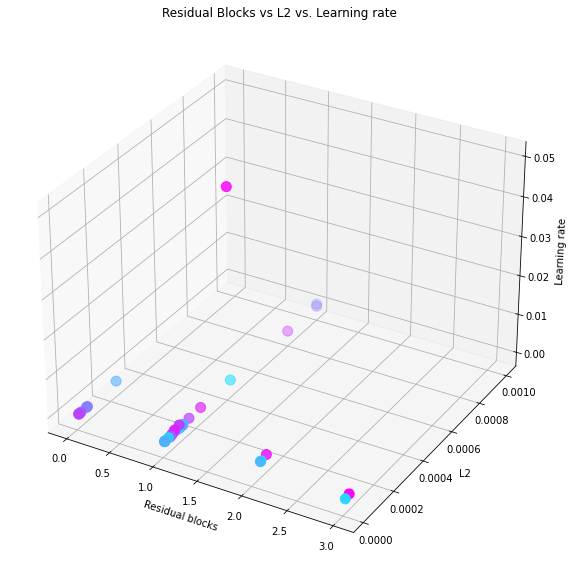

In [86]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res_f, l2_f, lr_f, c  = list(range(len(sort_loss))), s =400,  marker='.', cmap='cool')

ax.set_xlabel('Residual blocks')
ax.set_ylabel('L2')
ax.set_zlabel('Learning rate')

ax.set_title('Residual Blocks vs L2 vs. Learning rate')


In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res_f, kernels_f, filters_f, c  = list(range(len(sort_loss))), s =400,  marker='.', cmap='cool')

ax.set_xlabel('Residual blocks')
ax.set_ylabel('Kernel size')
ax.set_zlabel('Filters')

ax.set_title('Filters vs Residual Blocks vs. Kernel Size')
